<a href="https://colab.research.google.com/github/kelecheeii/Loan-Status-Prediction/blob/main/ML_Final_Project_Group_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelechi V. Mbibi

30221021

Machine Learning (ENEL 682) Project

April 2024

**About Dataset**

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files

upload_d = files.upload()

Saving loan_approval_dataset.xlsx to loan_approval_dataset.xlsx


In [4]:
# read the data.csv file into our workbook
data = pd.read_excel ('loan_approval_dataset.xlsx')

In [5]:
# next, we print the info of our columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
#there is a space before each feature

In [7]:
# we go on to separate the dataset into features (X) and target (y) whilst dropping the 'loan_id' column because it is inconsiquential to our analysis
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [8]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [9]:
y

,loan_status
0,Approved
1,Rejected
2,Rejected
3,Rejected
4,Rejected
...,...
4264,Rejected
4265,Approved
4266,Rejected
4267,Approved


In [10]:
# checking for missing values in X and y
print("missing values in X: \n{}".format(X.isnull().sum()))
print("\n")
print("missing values in y: {}".format(y.isnull().sum()))

missing values in X: 
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64


missing values in y: 0


In [11]:
print("Shape of X: {}".format(X.shape))
print("Shape of y: {} ".format(y.shape))

Shape of X: (4269, 11)
Shape of y: (4269,) 


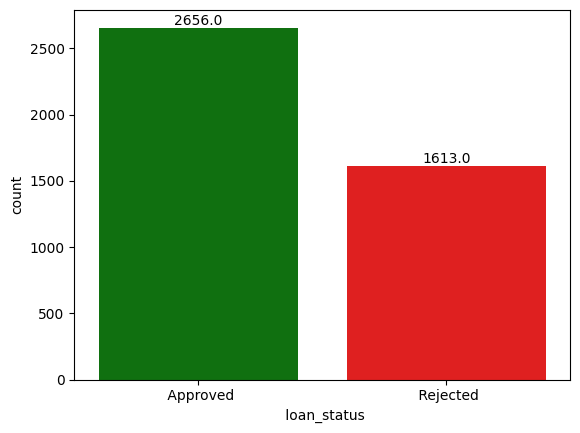

In [12]:
#Visualizing the number of approvals and rejections
colors = ['green', 'red']

sns.countplot(x = data[' loan_status'], palette=colors)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2.,
             p.get_height(),
             '{}'.format(p.get_height()),
             ha='center',
             va='bottom')

plt.show()

In [13]:
#segregating the loan applicants according to income level
def income_level(value):
    if 100000 <= value <= 1000000:
        return "Low"
    elif 1000001 <= value <= 4000000:
        return "Low-Middle"
    elif 4000001 <= value <= 7500000:
        return "Upper-Middle"
    elif 7500001 <= value <= 10000000:
        return "High"
    else:
        return "Very High Income"

data['Income level'] = data[' income_annum'].apply(income_level)

In [14]:
income = data['Income level'].value_counts().reset_index()
income = income.rename(columns={'Income level':'Income Levels', 'count': "Number of Applicants"})
income

,Income Levels,Number of Applicants
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,1047
3,Low,390


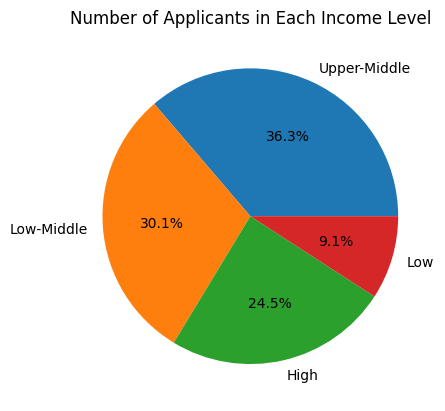

In [15]:
# Ploting a pie chart of loan applicants according to income level

plt.pie(income['Number of Applicants'], labels=income['Income Levels'], autopct="%1.1f%%")
plt.title("Number of Applicants in Each Income Level")
plt.show()

In [16]:
# Here, we encode categorical values values, scale numeric values and puts it into a pre-processing pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

numeric_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'no_of_dependents',
                    'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['education', 'self_employed']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,  make_column_selector(dtype_exclude="object")),
        ('cat', categorical_transformer,  make_column_selector(dtype_include="object"))])

In [17]:
# we instatiate the pipeline with Logistic regression as the placeholder
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', LogisticRegression(max_iter=1000))])

In [18]:
# split our data into 70% training and 30% testing splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=419)

In [19]:
# using gridsearch, we find the best model with the best parameters that gives us the best results
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'model': [LogisticRegression(max_iter=1000)],
     'model__C': [0.1, 1, 10, 100],
     'preprocessor': [preprocessor]},


    {'model': [KNeighborsClassifier()],
     'preprocessor': [preprocessor],
     'model__weights': ['uniform', 'distance'],
     'model__n_neighbors': ['1','3','5','7','9','11']},    # number of neighbors

    {'model': [GradientBoostingClassifier(random_state=0)],
     'preprocessor': [preprocessor],
     'model__n_estimators': [100, 200, 300, 400, 500],    # number of trees in the forest
     'model__max_depth': [1],         # maximun depth of the trees
     'model__learning_rate': [0.01, 0.1, 1, 10, 100]},

    {'model': [SVC()],
     'preprocessor': [preprocessor],
     'model__C': [0.1, 1, 10, 100],
     'model__kernel': ['linear','rbf', 'poly']}] #types of svc



grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)

In [20]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b9d96d3d0>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column...
                          'preprocessor': [ColumnTransformer(transformers=[('num',
                                                                            Pipeline(steps=[('scaler',
                                                                                             StandardScaler())]),
                                                                            <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b9d96d3d0>),
                                                                           ('cat',
                                                                            Pipeline(steps=[('onehot',
                                                                                             OneHotEncoder(handle_unknown='ignore'))]),
                                                                            <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b9af901d0>)])]}],
             return_train_score=True)

In [21]:
best_model = grid_search.best_estimator_

In [22]:
print("Best params:\n{}\n".format(grid_search.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best cross-validation test score: {:.2f}".format(grid_search.best_score_))
print("Test-set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best params:
{'model': GradientBoostingClassifier(random_state=0), 'model__learning_rate': 0.1, 'model__max_depth': 1, 'model__n_estimators': 500, 'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b9d96d3d0>),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b9af901d0>)])}

Best cross-validation train score: 0.99
Best cross-validation test score: 0.97
Test-set score: 0.98


In [23]:
# Define the variables
best_params = grid_search.best_params_
best_train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
best_cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

# Create the DataFrame
best_results = pd.DataFrame({
    'Metric': ['Best cross-validation train Score', 'Best cross-Validation test Score', 'Test-set score'],
    'Value': [best_train_score, best_cv_score, test_score]
})

# Display DataFrame
best_results

,Metric,Value
0,Best cross-validation train Score,0.987784
1,Best cross-Validation test Score,0.974567
2,Test-set score,0.979703


After comparing four classification models on our dataset; the results suggest that a Gradient Boosting Classifier model with specific hyperparameters achieved impressive performance on both the training and testing datasets:

Best Parameters:

The best model selected is a GradientBoostingClassifier with the following hyperparameters:
max_depth: 1
n_estimators: 500
learning_rate: 0.1
The preprocessing pipeline includes standard scaling for numerical features and one-hot encoding for categorical features.

Performance Metrics:

Best Cross-Validation Train Score: 0.99
This indicates that the model achieved a high level of accuracy (99%) on the training data during cross-validation. It suggests that the model effectively learned the patterns in the training data.
Best Cross-Validation Test Score: 0.97
The model also performed exceptionally well on unseen data, achieving a cross-validation accuracy of 97%. This suggests that the model has good generalization capability and is not overfitting to the training data.
Test-Set Score: 0.98
The accuracy of 98% on the test set further validates the model's performance. It indicates that the model maintains high accuracy when applied to completely unseen data, reinforcing confidence in its effectiveness.

Insights:

The high scores across all metrics suggest that the selected model with the specified hyperparameters and preprocessing steps is well-suited for the classification task.
The model demonstrates strong predictive power, achieving near-perfect accuracy on both the training and testing datasets.
The preprocessing steps, including standard scaling and one-hot encoding, effectively prepared the data for modeling, contributing to the model's overall performance.

Overall, the results indicate that the Gradient Boosting Classifier, with appropriate tuning and preprocessing, can effectively classify the data and make accurate predictions.

In [24]:
#now we do error analysis to conclude using a confusion matrix heatmap
from sklearn.metrics import accuracy_score
y_test_pred = best_model.predict(X_test)
validation_score = accuracy_score(y_test_pred, y_test)

In [25]:
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test,y_test_pred )
my_labels = ['Rejected','Approved']
print(Conf_Mat)

[[780  17]
 [  9 475]]


Text(0.5, 1.0, 'Confusion Matrix')

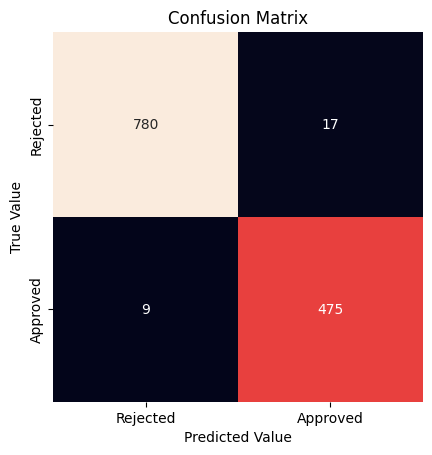

In [26]:
sns.heatmap(Conf_Mat, square=True, annot=True, cbar=False, fmt='d', xticklabels=my_labels, yticklabels=my_labels)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

we conducted an error analysis for our model's predictions and got the following insights;

Accuracy is a measure of how often the classifier is correct.

It is calculated as (TP + TN) / (TP + TN + FP + FN).
In this case, the accuracy can be calculated as (780 + 475) / (780 + 475 + 17 + 9) = 0.979, or 97.9%.

The high number of true positives (475) and true negatives (780) indicates that the model is making accurate predictions for both classes.

The low number of false positives (17) and false negatives (9) suggests that the model has a low rate of misclassification.

The overall accuracy of 97.9% suggests that the model is performing well in terms of correctly classifying instances from the test dataset.

